In [1]:
# 8.2 使用scikit-leran提供的K平均法處理分群問題

In [2]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE

from sklearn.metrics.cluster import homogeneity_score # 同質性
from sklearn.metrics.cluster import silhouette_score  # 輪廓係數 (樣本集,聚類標籤)

np.random.seed(123456)

bc = load_breast_cancer()
tsne = TSNE()

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


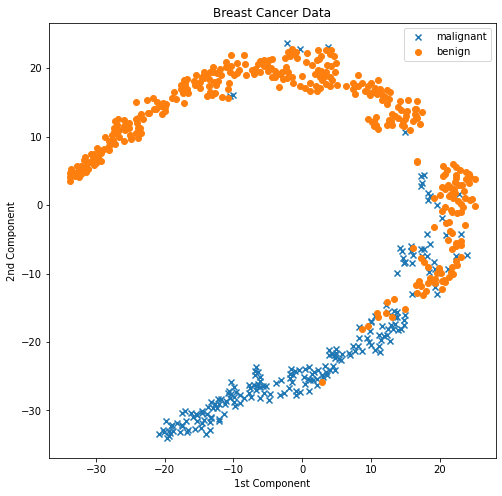

In [4]:
# --- 第 2 部分 ---
# 使用t-SNE降維
plt.figure(figsize = (8, 8))
data = tsne.fit_transform(bc.data)
reds = bc.target == 0
blues = bc.target == 1
plt.scatter(data[reds, 0], data[reds, 1], label='malignant', marker = 'x')
plt.scatter(data[blues, 0], data[blues, 1], label='benign') # 良性
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('Breast Cancer Data')
plt.legend()
plt.show()

# 有對資料做降維

----------------------------------------
Cluster 0. Malignant percentage:  {'m': 6, 'b': 260} 0.023
Cluster 1. Malignant percentage:  {'m': 206, 'b': 97} 0.680
homogeneity: 0.418
silhouette: 0.498
----------------------------------------
Cluster 0. Malignant percentage:  {'m': 136, 'b': 1} 0.993
Cluster 1. Malignant percentage:  {'m': 2, 'b': 128} 0.015
Cluster 2. Malignant percentage:  {'m': 70, 'b': 96} 0.422
Cluster 3. Malignant percentage:  {'m': 4, 'b': 132} 0.029
homogeneity: 0.608
silhouette: 0.575
----------------------------------------
Cluster 0. Malignant percentage:  {'m': 0, 'b': 78} 0.000
Cluster 1. Malignant percentage:  {'m': 2, 'b': 96} 0.020
Cluster 2. Malignant percentage:  {'m': 89, 'b': 0} 1.000
Cluster 3. Malignant percentage:  {'m': 80, 'b': 10} 0.889
Cluster 4. Malignant percentage:  {'m': 4, 'b': 86} 0.044
Cluster 5. Malignant percentage:  {'m': 37, 'b': 87} 0.298
homogeneity: 0.646
silhouette: 0.557


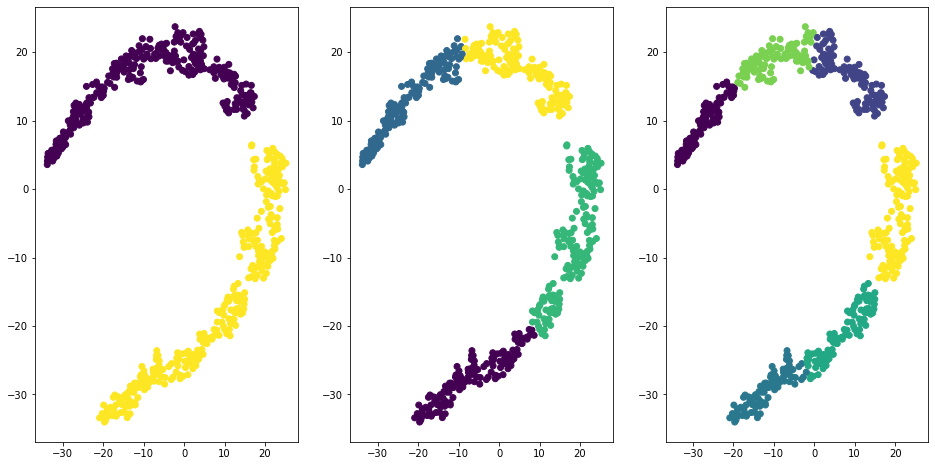

In [14]:
# --- 第 3 部分 ---
# 訓練模型
plt.figure(figsize = (16, 8))
plt.title('2, 4, and 6 clusters.')
for k in [2, 4, 6]:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(data)
    plt.subplot(1, 3, int(k/2))
    plt.scatter(*zip(*data), c=preds)

    classified = {x: {'m': 0, 'b': 0} for x in range(k)}

    for i in range(len(data)):
        p = preds[i]
        label = bc.target[i]
        label = 'm' if label == 0 else 'b'
        classified[p][label] = classified[p][label]+1

    print('-'*40)
    for c in classified:
        print('Cluster %d. Malignant percentage: ' % c, end=' ')
        print(classified[c], end=' ')
        print('%.3f' % 
                 (classified[c]['m'] / 
                 (classified[c]['m'] + classified[c]['b'])))

    print('homogeneity: %.3f' % homogeneity_score(bc.target, preds))
    print('silhouette: %.3f' % silhouette_score(data, preds))

# 沒有對資料做降維

In [19]:
data = bc.data

for clusters in [2, 4, 6]:
    km = KMeans(n_clusters=clusters)
    preds = km.fit_predict(data)

    classified = {x: {'m': 0, 'b': 0} for x in range(clusters)}

    for i in range(len(data)):
        cluster = preds[i]
        label = bc.target[i]
        label = 'm' if label == 0 else 'b'
        classified[cluster][label] = classified[cluster][label]+1

    print('-'*40)
    for c in classified:
        print('Cluster %d. Malignant percentage: ' % c, end=' ')
        print(classified[c], end=' ')
        print('%.3f' % (classified[c]['m'] /
                        (classified[c]['m'] + classified[c]['b'])))
         
    print('homogeneity: %.3f' % homogeneity_score(bc.target, preds))#同質性    (labels_true, labels_pred)[source]
    print('silhouette: %.3f' % silhouette_score(data, preds))       #輪廓係數  (X, labels)(樣本集,聚類標籤)

----------------------------------------
Cluster 0. Malignant percentage:  {'m': 82, 'b': 356} 0.187
Cluster 1. Malignant percentage:  {'m': 130, 'b': 1} 0.992
homogeneity: 0.422
silhouette: 0.697
----------------------------------------
Cluster 0. Malignant percentage:  {'m': 87, 'b': 94} 0.481
Cluster 1. Malignant percentage:  {'m': 19, 'b': 0} 1.000
Cluster 2. Malignant percentage:  {'m': 100, 'b': 1} 0.990
Cluster 3. Malignant percentage:  {'m': 6, 'b': 262} 0.022
homogeneity: 0.575
silhouette: 0.533
----------------------------------------
Cluster 0. Malignant percentage:  {'m': 37, 'b': 145} 0.203
Cluster 1. Malignant percentage:  {'m': 35, 'b': 0} 1.000
Cluster 2. Malignant percentage:  {'m': 65, 'b': 9} 0.878
Cluster 3. Malignant percentage:  {'m': 11, 'b': 0} 1.000
Cluster 4. Malignant percentage:  {'m': 5, 'b': 203} 0.024
Cluster 5. Malignant percentage:  {'m': 59, 'b': 0} 1.000
homogeneity: 0.620
silhouette: 0.483
